# **Hubbard triangle**

## CMS Project - TU WIEN
#### Alexander Wurm
#### alexander.wurm@tuwien.ac.at

In [1]:
from config import *
from functions import *

![title](task.png)

In [2]:
# generate states
states = generate_states(N_electrons)

# generate Hamiltonian
Hamiltonian = generate_Hamiltonian(states)

# generate Sz matrix
S = calc_S(states)

# calculate the ground state eigenvalue and eigenvector
eigval, eigvec = np.linalg.eig(Hamiltonian)

ground_state_eigval = min(eigval)
ground_state_eigvec = eigvec[np.argmin(ground_state_eigval)]

In [3]:
printM(states)

⎡0  0  0  0  1  1⎤
⎢                ⎥
⎢0  0  0  1  0  1⎥
⎢                ⎥
⎢0  0  0  1  1  0⎥
⎢                ⎥
⎢0  0  1  0  0  1⎥
⎢                ⎥
⎢0  0  1  0  1  0⎥
⎢                ⎥
⎢0  0  1  1  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  1⎥
⎢                ⎥
⎢0  1  0  0  1  0⎥
⎢                ⎥
⎢0  1  0  1  0  0⎥
⎢                ⎥
⎢0  1  1  0  0  0⎥
⎢                ⎥
⎢1  0  0  0  0  1⎥
⎢                ⎥
⎢1  0  0  0  1  0⎥
⎢                ⎥
⎢1  0  0  1  0  0⎥
⎢                ⎥
⎢1  0  1  0  0  0⎥
⎢                ⎥
⎣1  1  0  0  0  0⎦

In [4]:
# print Hamiltonian matrix
printM(Hamiltonian)

⎡0.0   -1.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎤
⎢                                                                                        ⎥
⎢-1.0  0.0   -1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢1.0   -1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   4.0   -1.0  -1.0  -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   -1.0  0.0   -1.0  0.0   -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   -1.0  -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0   -1.0  0.0   0.0 ⎥

In [5]:
# print Sz matrix
printM(S)

⎡0.333333333333333         0.0                0.0         0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0         0.333333333333333         0.0         0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0                0.0         0.333333333333333  0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0                0.0                0.0         0.0         0.0                 0.0                 0.0          0.0         0

In [6]:
# show that [H, Sz] = 0
printM(Hamiltonian*S - S*Hamiltonian)

⎡0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎤
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢           

In [7]:
printM(eigvec)

⎡-0.816496580927726  -0.577350269189626  -0.0926578937633839         0.0                 0.0                 0.0                 0.0           
⎢                                                                                                                                              
⎢-0.408248290463863  0.577350269189626    0.656209938905067          0.0                 0.0                 0.0                 0.0           
⎢                                                                                                                                              
⎢0.408248290463863   -0.577350269189626   0.748867832668451          0.0                 0.0                 0.0                 0.0           
⎢                                                                                                                                              
⎢       0.0                 0.0                  0.0          -0.213070068635884  0.301326580800633   -0.536595265712282  -0.75886030227

In [8]:
ground_state_eigval

In [9]:
printM(ground_state_eigvec)

⎡-0.816496580927726 ⎤
⎢                   ⎥
⎢-0.577350269189626 ⎥
⎢                   ⎥
⎢-0.0926578937633839⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎣        0.0        ⎦

**Berechne Sz für U = 1 ... 4:**

In [10]:
U = np.arange(1, 4.1, 0.1)
SUi = []

for Ui in U:
    # generate Hamiltonian
    Hamiltonian = generate_Hamiltonian(states, Ui)
    # calculate the ground state eigenvalue and eigenvector
    eigval, eigvec = np.linalg.eig(Hamiltonian)
    ground_state_eigval = min(eigval)
    ground_state_eigvec = eigvec[:,np.argmin(eigval)] 
    
    su_tmp = 0
    
    for i,x in enumerate (ground_state_eigvec):
        if x != 0:            
            """
            while b < NSITES:    
                while a < len(states):
                    res = up(states[a])[b] - down(states[a])[b]
                    su_tmp += x**2 * (res*res)
                    a+=1
                a=0
                b+=1
            """             
            res_1 = up(states[i])[0] - down(states[i])[0]
            res_2 = up(states[i])[1] - down(states[i])[1]
            res_3 = up(states[i])[2] - down(states[i])[2]
            su_tmp += x**2 * (res_1*res_2 + res_2*res_3 + res_3*res_1) / NSITES
                               
    SUi.append(su_tmp)
    
    #SUi.append(ground_state_eigvec@S@ground_state_eigvec)

Text(0.5, 1.0, 'spin-spin correlation function $S$ vs. $U$\nN_electrons = 2')

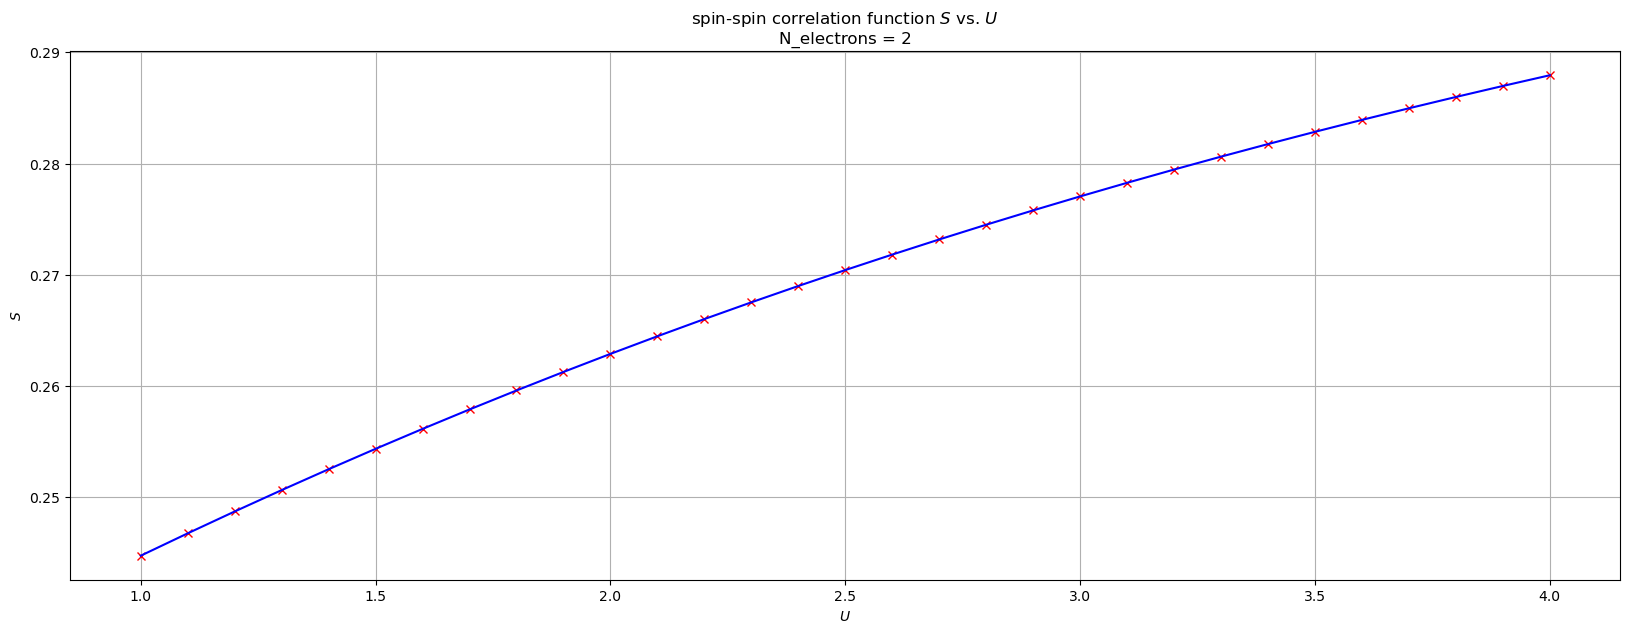

In [11]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams['figure.dpi'] = 100
plt.plot(U, np.abs(SUi), 'rx')
plt.plot(U, np.abs(SUi), 'b')
plt.grid()
plt.xlabel("$U$")
plt.ylabel(r"$S$")
plt.title(r"spin-spin correlation function $S$ vs. $U$" "\n" "N_electrons = {:g}" .format(N_electrons))